In [216]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [217]:
df = pd.read_csv('/content/Diabetes_Predicition_Project/diabetes.csv')

In [218]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [219]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [220]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [221]:
df.shape

(768, 9)

In [222]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [223]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [224]:
df.duplicated().sum()

0

In [225]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [226]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


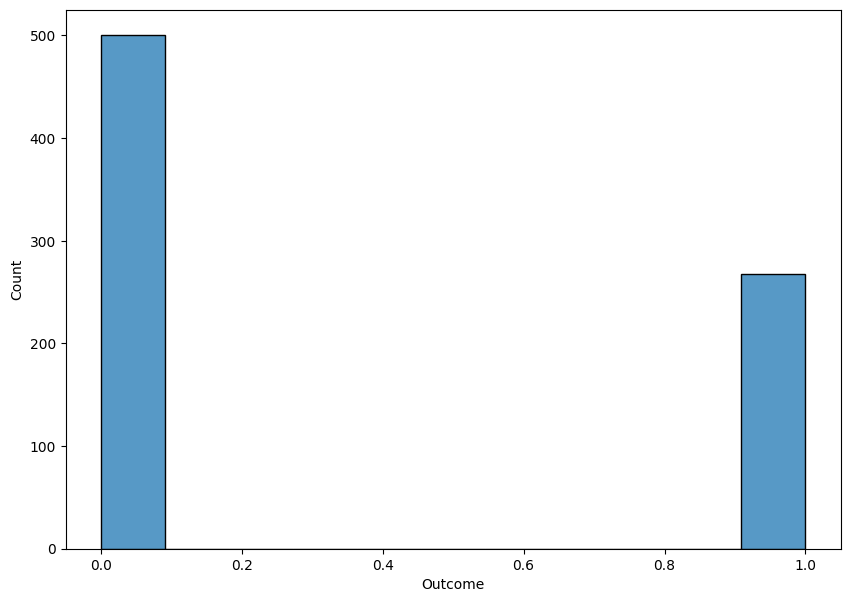

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.histplot(data =df, x='Outcome')
plt.show()

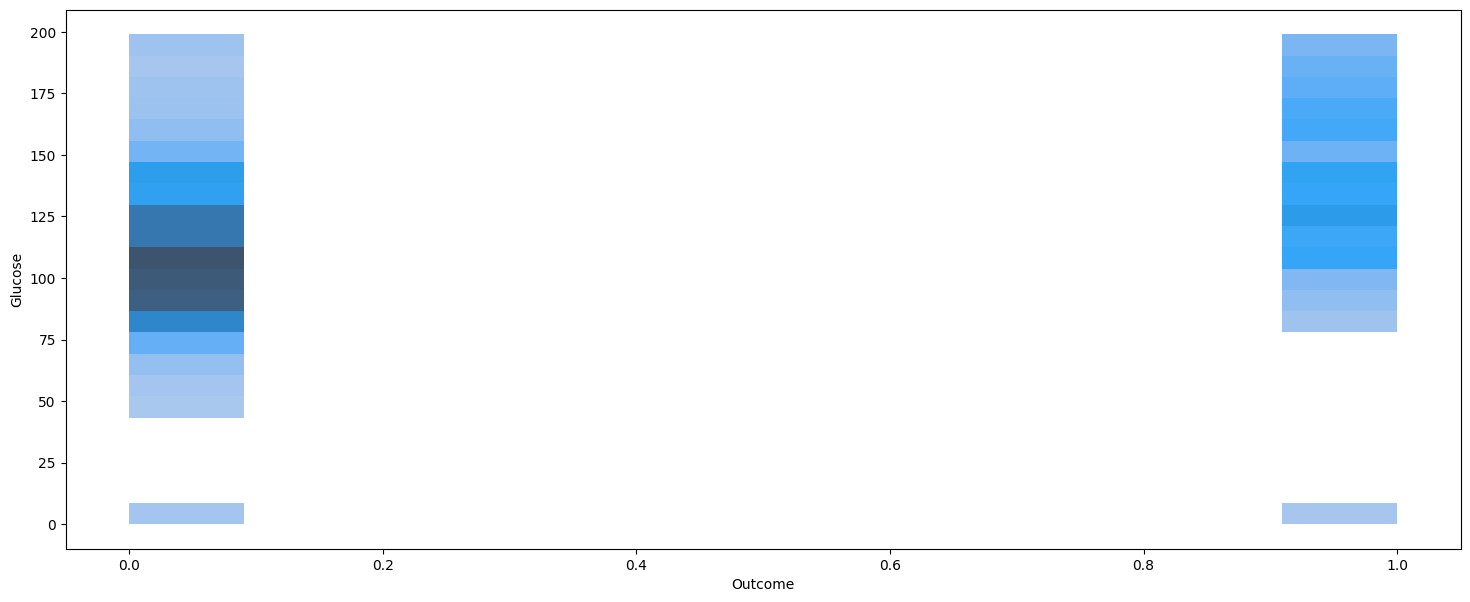

In [228]:
plt.figure(figsize=(18,7))
sns.histplot(data =df , x='Outcome' , y='Glucose' )
plt.show()

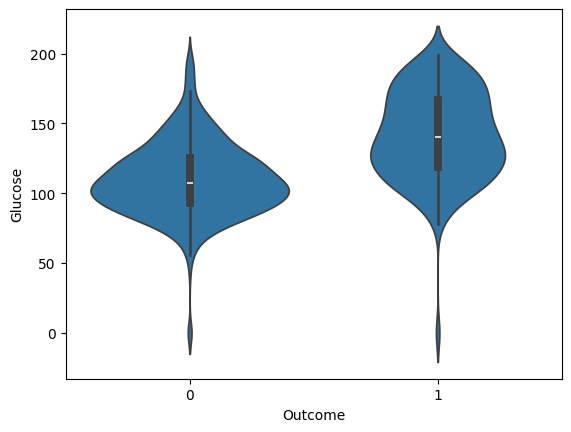

In [229]:
sns.violinplot(x="Outcome", y="Glucose", data=df)
plt.show()

<Axes: xlabel='Outcome', ylabel='Age'>

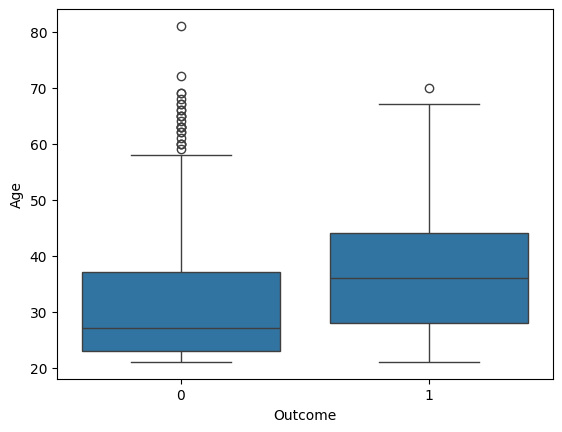

In [230]:
sns.boxplot(data=df, x= 'Outcome' , y='Age')

In [231]:
df.groupby('Outcome')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,31.190000,11.667655,21.0,23.0,27.0,37.0,81.0
1,268.0,37.067164,10.968254,21.0,28.0,36.0,44.0,70.0


In [232]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [233]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [234]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [235]:
print(X.shape, y.shape)

(768, 8) (768,)


In [236]:
scaler = StandardScaler()

In [237]:
scaler.fit(X)

StandardScaler()

In [238]:
standarized=scaler.transform(X)

In [239]:
print(standarized)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [240]:
X = standarized
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,stratify=y, random_state=10)

In [242]:
print(X.shape, X_test.shape, X_train.shape)

(768, 8) (154, 8) (614, 8)


In [243]:
Classifier = svm.SVC(kernel='linear')

In [244]:
Classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [245]:
X_train_predict = Classifier.predict(X_train)
test_score = accuracy_score(X_train_predict, y_train)

In [246]:
print(test_score)

0.7654723127035831


In [247]:
X_test_predict = Classifier.predict(X_test)
test_score = accuracy_score(X_test_predict, y_test)

In [248]:
print(test_score)

0.8246753246753247


In [249]:
input_data = (1,189,60,23,846,30.1,0.398,59)
print(input_data)

(1, 189, 60, 23, 846, 30.1, 0.398, 59)


In [250]:
input_data_asnp_array=np.asarray(input_data)
print(input_data_asnp_array)

[1.00e+00 1.89e+02 6.00e+01 2.30e+01 8.46e+02 3.01e+01 3.98e-01 5.90e+01]


In [251]:
input_data_reshaped= input_data_asnp_array.reshape(1,-1)
print(input_data_reshaped)

[[1.00e+00 1.89e+02 6.00e+01 2.30e+01 8.46e+02 3.01e+01 3.98e-01 5.90e+01]]


In [252]:
standrized_input = scaler.transform(input_data_reshaped)
print(standrized_input)

[[-0.84488505  2.13150675 -0.47073225  0.15453319  6.65283938 -0.24020459
  -0.2231152   2.19178518]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [253]:
predictionn = Classifier.predict(standrized_input)
print(predictionn)

[1]


In [254]:
import pickle
pickle.dump(Classifier,open('model.pkl', 'wb'))

In [255]:
model = pickle.load(open('model.pkl', 'rb'))